In [1]:
!pip install yfinance
!pip insstall pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install pyfolio

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
ERROR: unknown command "insstall" - maybe you meant "install"
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [1]:
import math
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pyfolio as pf

# silence warnings
import warnings
warnings.filterwarnings('ignore')

/home/2e1f18d2-53a4-4191-b248-744a54220cb8/.local/lib/python3.11/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


[*********************100%%**********************]  1 of 1 completed


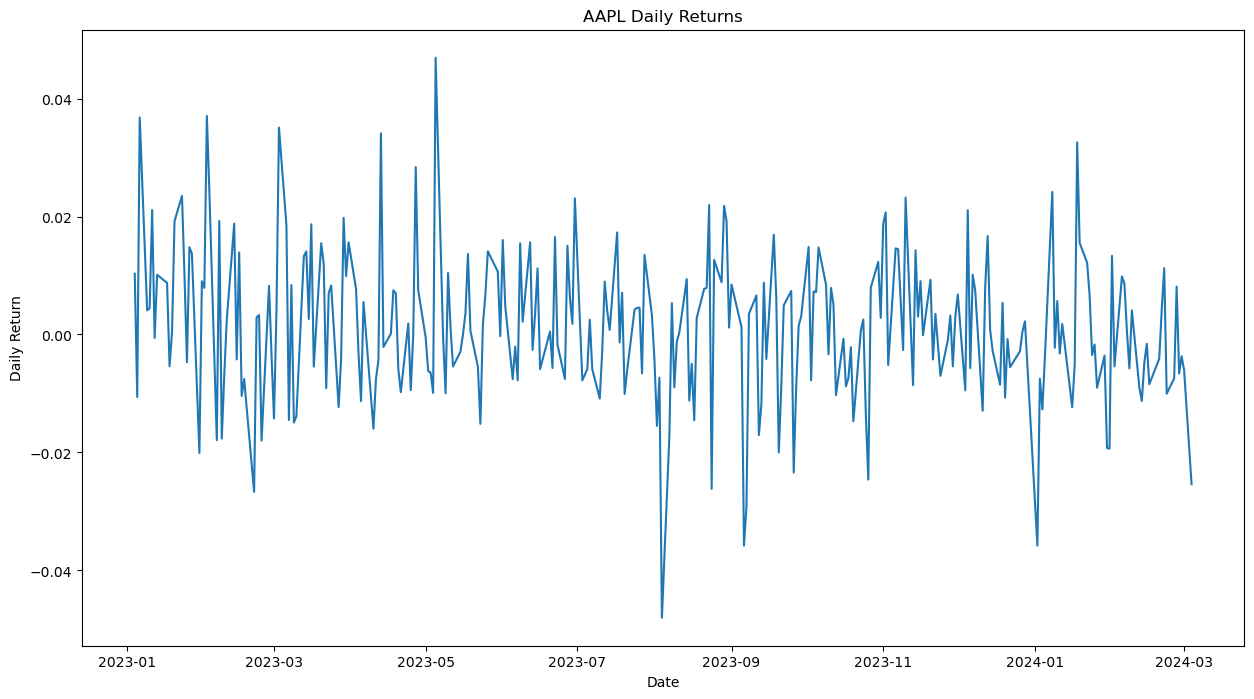

In [7]:
#Daily Returns Calculation & Visualizaton

#set your stock ticker
ticker = 'AAPL'

stock_analysis = yf.download(ticker, start = "2023-01-01", end = "2024-03-05").dropna()
stock_analysis["Daily_Return"] = stock_analysis["Adj Close"].pct_change()
stock_analysis.head()

plt.figure(figsize=(15,8))
plt.plot(stock_analysis['Daily_Return'])
plt.title(f"{ticker} Daily Returns")
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

In [4]:
#Volatility Calculation

volatility  = stock_analysis['Daily_Return'].std()
print(f"Volatility : {volatility}")

Volatility : 0.02464782886595963


In [5]:
#Sharpe Ratio Calculation

risk_free_rate = 0.387 #10-year Treasury
annual_return = (stock_analysis['Daily_Return'].mean()+1) **252 - 1
annual_volatility = stock_analysis['Daily_Return'].std() * np.sqrt(252)
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
print(f"Sharpe Ratio : {sharpe_ratio}")

Sharpe Ratio : -0.6309797604658219


Beta of DXCM is 0.9111858169056891


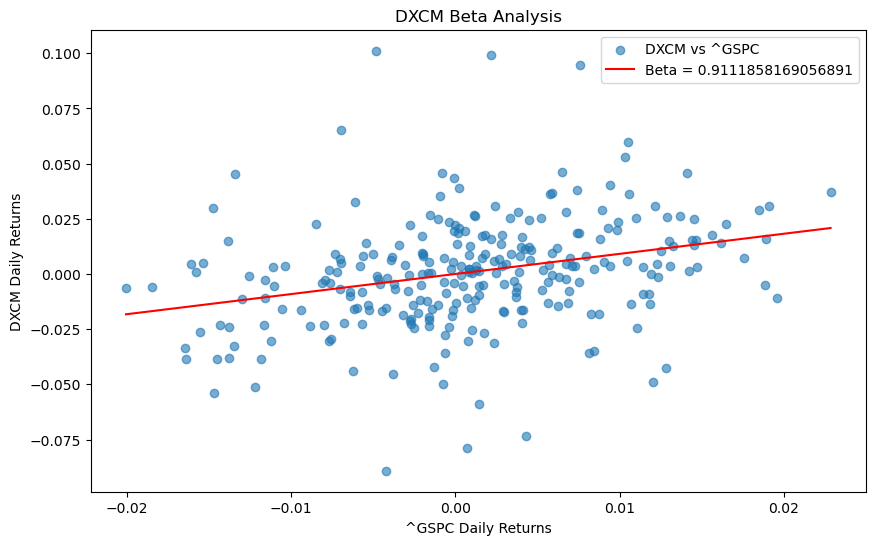

In [6]:
#Beta Calculation and Graphing

def get_stock_data(ticker, start_date, end_date):
    try:
        stock = yf.Ticker(ticker)
        stock_data = stock.history(start=start_date, end=end_date)
        return stock_data
    except ValueError:
        print(f"Invalid ticker: {ticker}")
        return None
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {str(e)}")
        return None

def calculate_beta(stock_returns, market_returns):
    covariance = np.cov(stock_returns, market_returns)[0, 1]
    market_variance = np.var(market_returns)
    beta = covariance / market_variance
    return beta

def main():
    # Input parameters
    ticker =   # Replace with the ticker of the stock you're interested in
    market_ticker = '^GSPC'  # Ticker for S&P 500 index
    start_date = "2023-01-01"
    end_date = "2024-02-05"
    
    # Get stock and market data
    stock_data = get_stock_data(ticker, start_date, end_date)
    market_data = get_stock_data(market_ticker, start_date, end_date)
    
    if stock_data is None or market_data is None:
        return
    
    # Calculate daily returns
    stock_returns = stock_data['Close'].pct_change().dropna()
    market_returns = market_data['Close'].pct_change().dropna()
    
    # Calculate beta
    beta = calculate_beta(stock_returns, market_returns)
    print(f'Beta of {ticker} is {beta}')
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(market_returns, stock_returns, alpha=0.6, label=f'{ticker} vs {market_ticker}')
    
    # Add a line representing the beta
    x_values = np.linspace(min(market_returns), max(market_returns), 100)
    y_values = beta * x_values
    plt.plot(x_values, y_values, label=f'Beta = {beta}', color='red')
    
    plt.xlabel(f'{market_ticker} Daily Returns')
    plt.ylabel(f'{ticker} Daily Returns')
    plt.legend()
    plt.title(f'{ticker} Beta Analysis')
    plt.show()

if __name__ == "__main__":
    main()

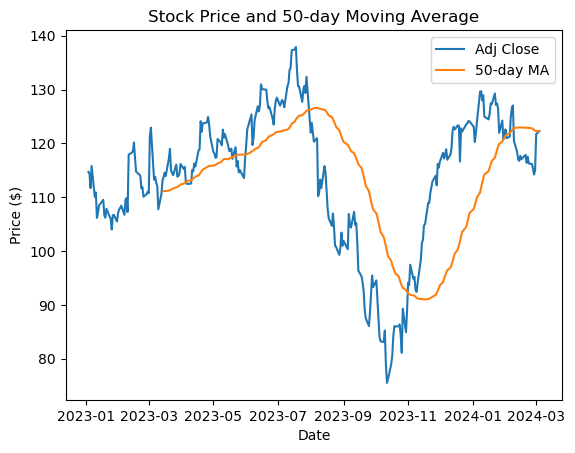

In [7]:
#Moving Average Calcualtion & Visualization

stock_analysis['50_MA'] = stock_analysis['Adj Close'].rolling(window = 50).mean()
stock_analysis.head()

#Visualization

plt.plot(stock_analysis['Adj Close'], label = 'Adj Close')
plt.plot(stock_analysis['50_MA'], label = '50-day MA')
plt.title('Stock Price and 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


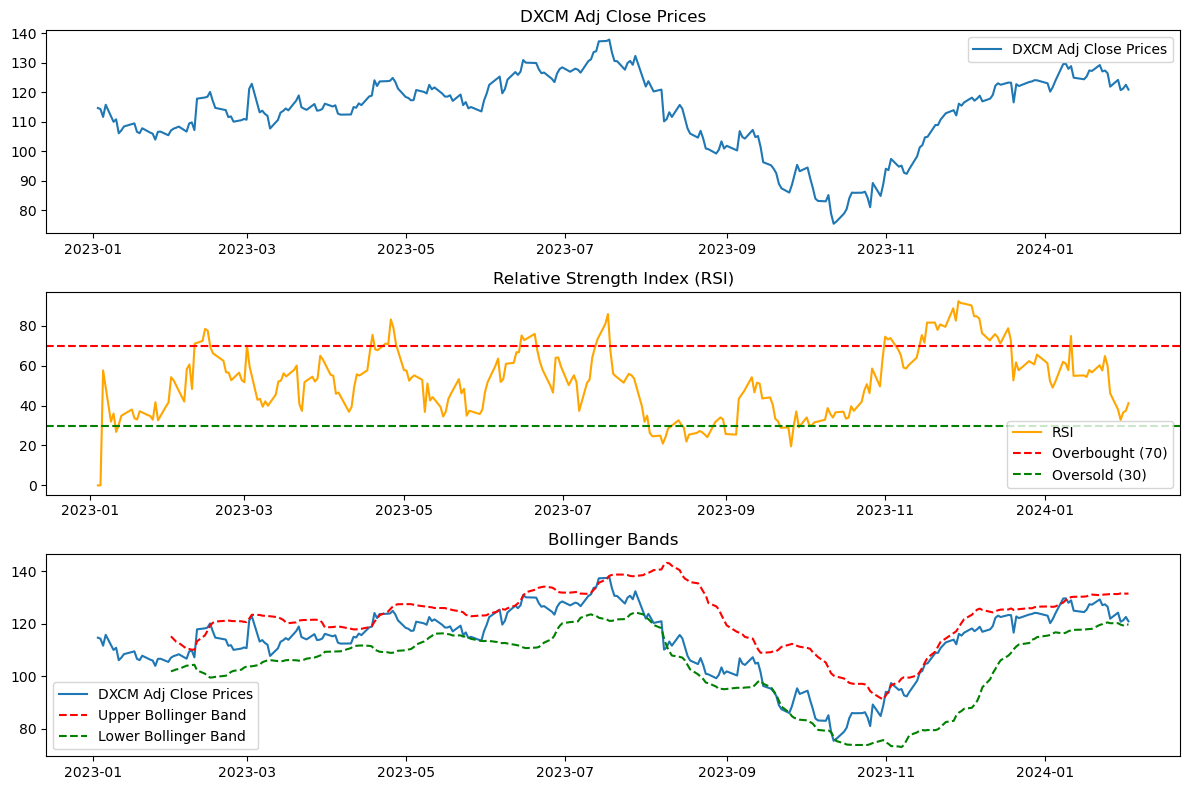

In [8]:
#Bollinger Bands and RSI calculation and visualization

def calculate_rsi(data, window=14):
    diff = data['Close'].diff(1)
    gain = diff.where(diff > 0, 0)
    loss = -diff.where(diff < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_bollinger_bands(data, window=20, num_std=2):
    rolling_mean = data['Close'].rolling(window=window).mean()
    upper_band = rolling_mean + num_std * data['Close'].rolling(window=window).std()
    lower_band = rolling_mean - num_std * data['Close'].rolling(window=window).std()
    return upper_band, lower_band

# Replace ' ' with your stock symbol
stock_symbol = 'DXCM'

# Download historical stock prices
stock_data = yf.download(stock_symbol, start='2023-01-01', end='2024-02-05')

# Calculate RSI
stock_data['RSI'] = calculate_rsi(stock_data)

# Calculate Bollinger Bands
stock_data['Upper_Band'], stock_data['Lower_Band'] = calculate_bollinger_bands(stock_data)

# Plotting
plt.figure(figsize=(12, 8))

# Plotting Close Prices
plt.subplot(3, 1, 1)
plt.plot(stock_data['Adj Close'], label=f'{stock_symbol} Adj Close Prices')
plt.title(f'{stock_symbol} Adj Close Prices')
plt.legend()

# Plotting RSI
plt.subplot(3, 1, 2)
plt.plot(stock_data['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()

# Plotting Bollinger Bands
plt.subplot(3, 1, 3)
plt.plot(stock_data['Adj Close'], label=f'{stock_symbol} Adj Close Prices')
plt.plot(stock_data['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='red')
plt.plot(stock_data['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='green')
plt.title('Bollinger Bands')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
#RLFUY2UU8Y9N20UE
#For getting financial ratios, THIS WILL FAIL FOR ETF'S / MUTUAL FUNDS

import requests

# Replace 'YOUR_API_KEY' with your Alpha Vantage API key
api_key = 'RLFUY2UU8Y9N20UE'

# Replace ' ' with the stock symbol you are interested in
symbol = 'DXCM'

# Endpoint for getting fundamental data
url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={api_key}'

# Make the API request
response = requests.get(url)
data = response.json()

# Print financial ratios
if 'Symbol' in data:
    print(f"Financial Ratios for {data['Symbol']}:")
    print(f"PE Ratio: {data.get('PERatio')}")
    print(f"Forward PE Ratio: {data.get('ForwardPERatio')}")
    print(f"PEG Ratio: {data.get('PEGRatio')}")
    print(f"Price to Sales Ratio (TTM): {data.get('PriceToSalesRatioTTM')}")
    print(f"Price to Book Ratio (MRQ): {data.get('PriceToBookRatioMRQ')}")
else:
    print("Error fetching data. Check the stock symbol and API key.")

Financial Ratios for DXCM:
PE Ratio: 76.68
Forward PE Ratio: None
PEG Ratio: 2.532
Price to Sales Ratio (TTM): 14.49
Price to Book Ratio (MRQ): None
